# 1

Read the documentation at https://vincentarelbundock.github.io/Rdatasets/doc/carData/WVS.html.
    

# 2

In [3]:
import pandas as pd
wvs_df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/carData/WVS.csv", index_col=0)
wvs_df.head(7)

,poverty,religion,degree,country,age,gender
1,Too Little,yes,no,USA,44,male
2,About Right,yes,no,USA,40,female
3,Too Little,yes,no,USA,36,female
4,Too Much,yes,yes,USA,25,female
5,Too Little,yes,yes,USA,39,male
6,About Right,yes,no,USA,80,female
7,Too Much,yes,no,USA,48,female


# 3

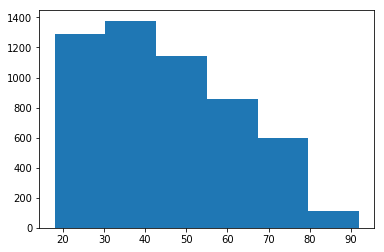

In [4]:
import matplotlib.pyplot as plt
plt.hist(wvs_df['age'], bins=6)
plt.show()

# 4

In [28]:
# Prepare the data, i.e. the counts of the different 'poverty' values for Swedish respondents 
pov_swe_pa = wvs_df[wvs_df['country']=='Sweden'].groupby(['poverty'])[['poverty']].count()
pov_swe_pa

,poverty
poverty,
About Right,374
Too Little,604
Too Much,25


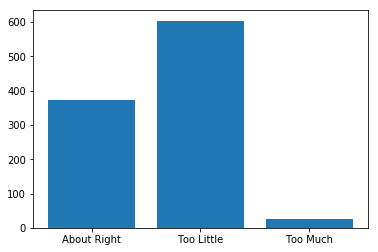

In [30]:
# Plot the barchart
plt.bar(range(0, len(pov_swe_pa)), height=pov_swe_pa['poverty'], tick_label=pov_swe_pa.index)
# Function savefig() must be called before show(); 
# the bbox_inches value 'tight' forces the function to fit exactly everything into the png
plt.savefig('poverty.png', format='png', bbox_inches='tight')
plt.show()

# 5

We will apply the Chi-Squared test as there are looking at two categorical variables

In [37]:
# Import the stats package and prepare the contingency table
import scipy.stats as ss
gen_pov_xtabl = pd.crosstab(index=wvs_df['poverty'], columns=wvs_df['gender'])
gen_pov_xtabl

gender,female,male
poverty,,
About Right,892,970
Too Little,1435,1273
Too Much,398,413


In [38]:
# Apply the test
# Apply the Chi-squared test to the data
chisq, p, dof, evs = ss.chi2_contingency(gen_pov_xtabl)
print("chi-squared " + str(chisq))
print("p = " + str(p))
print("degrees of freedom = " + str(dof))
print("expected value table: ")
print(evs)

chi-squared 12.35342614822168
p = 0.0020772443941503215
degrees of freedom = 2
expected value table: 
[[ 942.93811559  919.06188441]
 [1371.36220033 1336.63779967]
 [ 410.69968407  400.30031593]]


Interpretation: The p value is low. At any usual confidence levels (e.g. 5% or 1%) the Chi-squared statistic value is significant, indicating a significant correlation between gender and opinions on poverty.

# 6

Here we apply the one-way ANOVA test as we are dealing with one categorical and one numeric variable.

**Some notes on the code below**
- the star (\*) operator placed at the beginning of the argument list to f_oneway() allows us to pass in a list comprehension that creates a list of value series
- the test function evaluates to an object containing the F-statistic and the pvalue, which is what is printed out when the function is called 

In [44]:
ss.f_oneway(*(wvs_df['age'][wvs_df['poverty'] == poverty] for poverty in wvs_df['poverty'].unique()))

F_onewayResult(statistic=42.592074613323476, pvalue=4.440814948955822e-19)

Interpretation: The p value is extremely low. At any usual or higher confidence levels (5%, 1% and higher) the f-statistic value is significant, indicating a likely difference between the opinions about poverty in different age groups.